In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import random

plt.rcParams['figure.dpi'] = 300


In [2]:
meta = pd.read_csv("../ref/mirna_metadata.csv")

cpm_2 = pd.read_csv("../counts/cpm_over2_matrix_gene_name.tsv", sep="\t", index_col=0)


In [3]:
# run PCA
input_df = cpm_2.transpose() # transpose the matrix so samples are in rows
pca = PCA(cpm_2.shape[1]) # compute the same # of PCs as samples
pca.fit(input_df)


PCA(n_components=24)

In [4]:
############ Percent variance explained bar plot
# Make df to plot the percent variance explained
pct_explained_df = pd.DataFrame(data=pca.explained_variance_ratio_,
                                columns=['prop_variance'])

# compute percent variance from proportion variance
pct_explained_df['pct_variance'] = pct_explained_df.prop_variance*100
pct_explained_df['PC'] = list(range(1, cpm_2.shape[1]+1))
print(pct_explained_df)

    prop_variance  pct_variance  PC
0    5.603438e-01  5.603438e+01   1
1    3.252287e-01  3.252287e+01   2
2    9.668927e-02  9.668927e+00   3
3    6.752337e-03  6.752337e-01   4
4    3.524822e-03  3.524822e-01   5
5    3.147155e-03  3.147155e-01   6
6    1.722809e-03  1.722809e-01   7
7    1.185460e-03  1.185460e-01   8
8    5.021773e-04  5.021773e-02   9
9    3.702760e-04  3.702760e-02  10
10   2.281667e-04  2.281667e-02  11
11   9.658894e-05  9.658894e-03  12
12   6.298627e-05  6.298627e-03  13
13   4.185556e-05  4.185556e-03  14
14   2.954880e-05  2.954880e-03  15
15   1.966868e-05  1.966868e-03  16
16   1.518905e-05  1.518905e-03  17
17   1.457430e-05  1.457430e-03  18
18   1.157942e-05  1.157942e-03  19
19   6.164970e-06  6.164970e-04  20
20   2.805059e-06  2.805059e-04  21
21   2.239577e-06  2.239577e-04  22
22   1.873951e-06  1.873951e-04  23
23   4.957895e-32  4.957895e-30  24


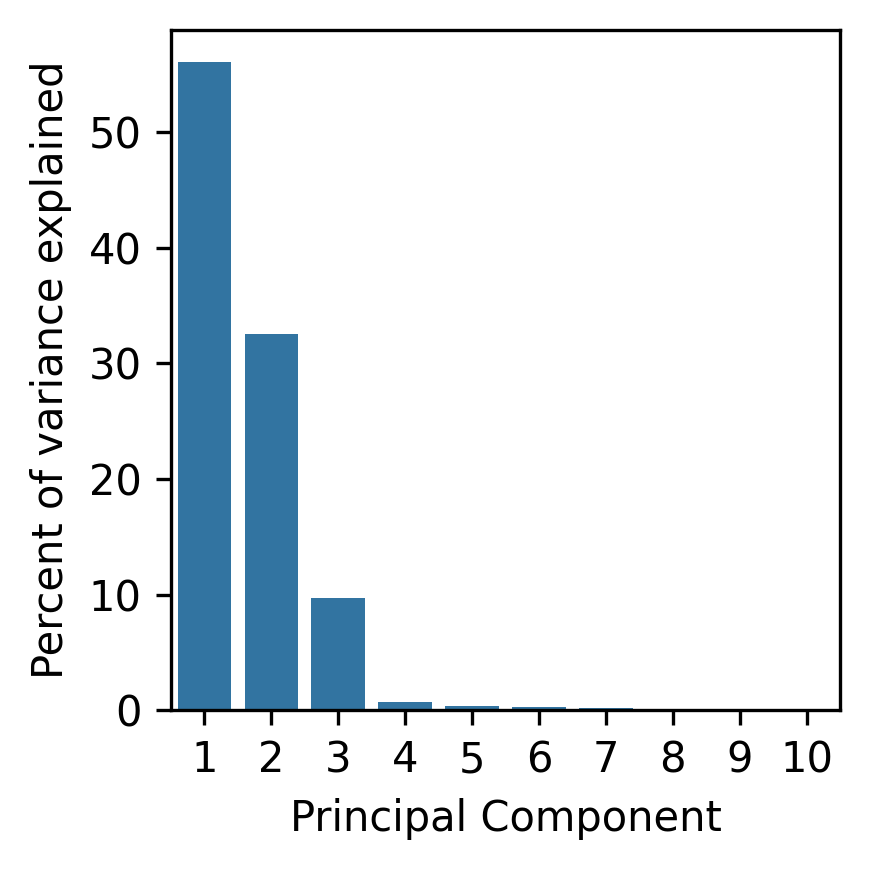

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))

# Filter to just the first 10 PCs
subset_df = pct_explained_df.iloc[:10]

# Plot using barplot
sns.barplot(
    data=subset_df,
    x='PC',
    y='pct_variance',
    ax=ax
)

# Set axis labels
ax.set_xlabel("Principal Component")
ax.set_ylabel("Percent of variance explained")

plt.tight_layout()
plt.show()


In [6]:
# Save the plot 
#plt.savefig('../plots/pca_variance_explained.png', dpi=300)


In [7]:
############ actual PCA plot

# first calculate the PCA representation of the data
pca_data = pca.transform(input_df) 
cols = ['PC{} ({:.1f}%)'.format(pc, var) for pc, var in zip(pct_explained_df.PC, pct_explained_df.pct_variance)]
print(cols)
pca_df = pd.DataFrame(data=pca_data, columns=cols)
pca_df.set_index(input_df.index, inplace=True)


['PC1 (56.0%)', 'PC2 (32.5%)', 'PC3 (9.7%)', 'PC4 (0.7%)', 'PC5 (0.4%)', 'PC6 (0.3%)', 'PC7 (0.2%)', 'PC8 (0.1%)', 'PC9 (0.1%)', 'PC10 (0.0%)', 'PC11 (0.0%)', 'PC12 (0.0%)', 'PC13 (0.0%)', 'PC14 (0.0%)', 'PC15 (0.0%)', 'PC16 (0.0%)', 'PC17 (0.0%)', 'PC18 (0.0%)', 'PC19 (0.0%)', 'PC20 (0.0%)', 'PC21 (0.0%)', 'PC22 (0.0%)', 'PC23 (0.0%)', 'PC24 (0.0%)']


In [8]:
meta['sampleID'] = meta['sampleID'].astype(str)
pca_df = pca_df.merge(meta, left_index=True, right_on='sampleID')


In [9]:
colors = [
    "#E64B35", "#4DBBD5", "#00A087", "#3C5488", "#F39B7F", "#8491B4",
    "#91D1C2", "#DC0000", "#7E6148", "#B09C85", "#FF6F00", "#6A3D9A",
    "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02",
    "#A6761D", "#666666", "#A6CEE3", "#FB9A99", "#FDBF6F", "#CAB2D6"
]

random.seed(42)
random.shuffle(colors)


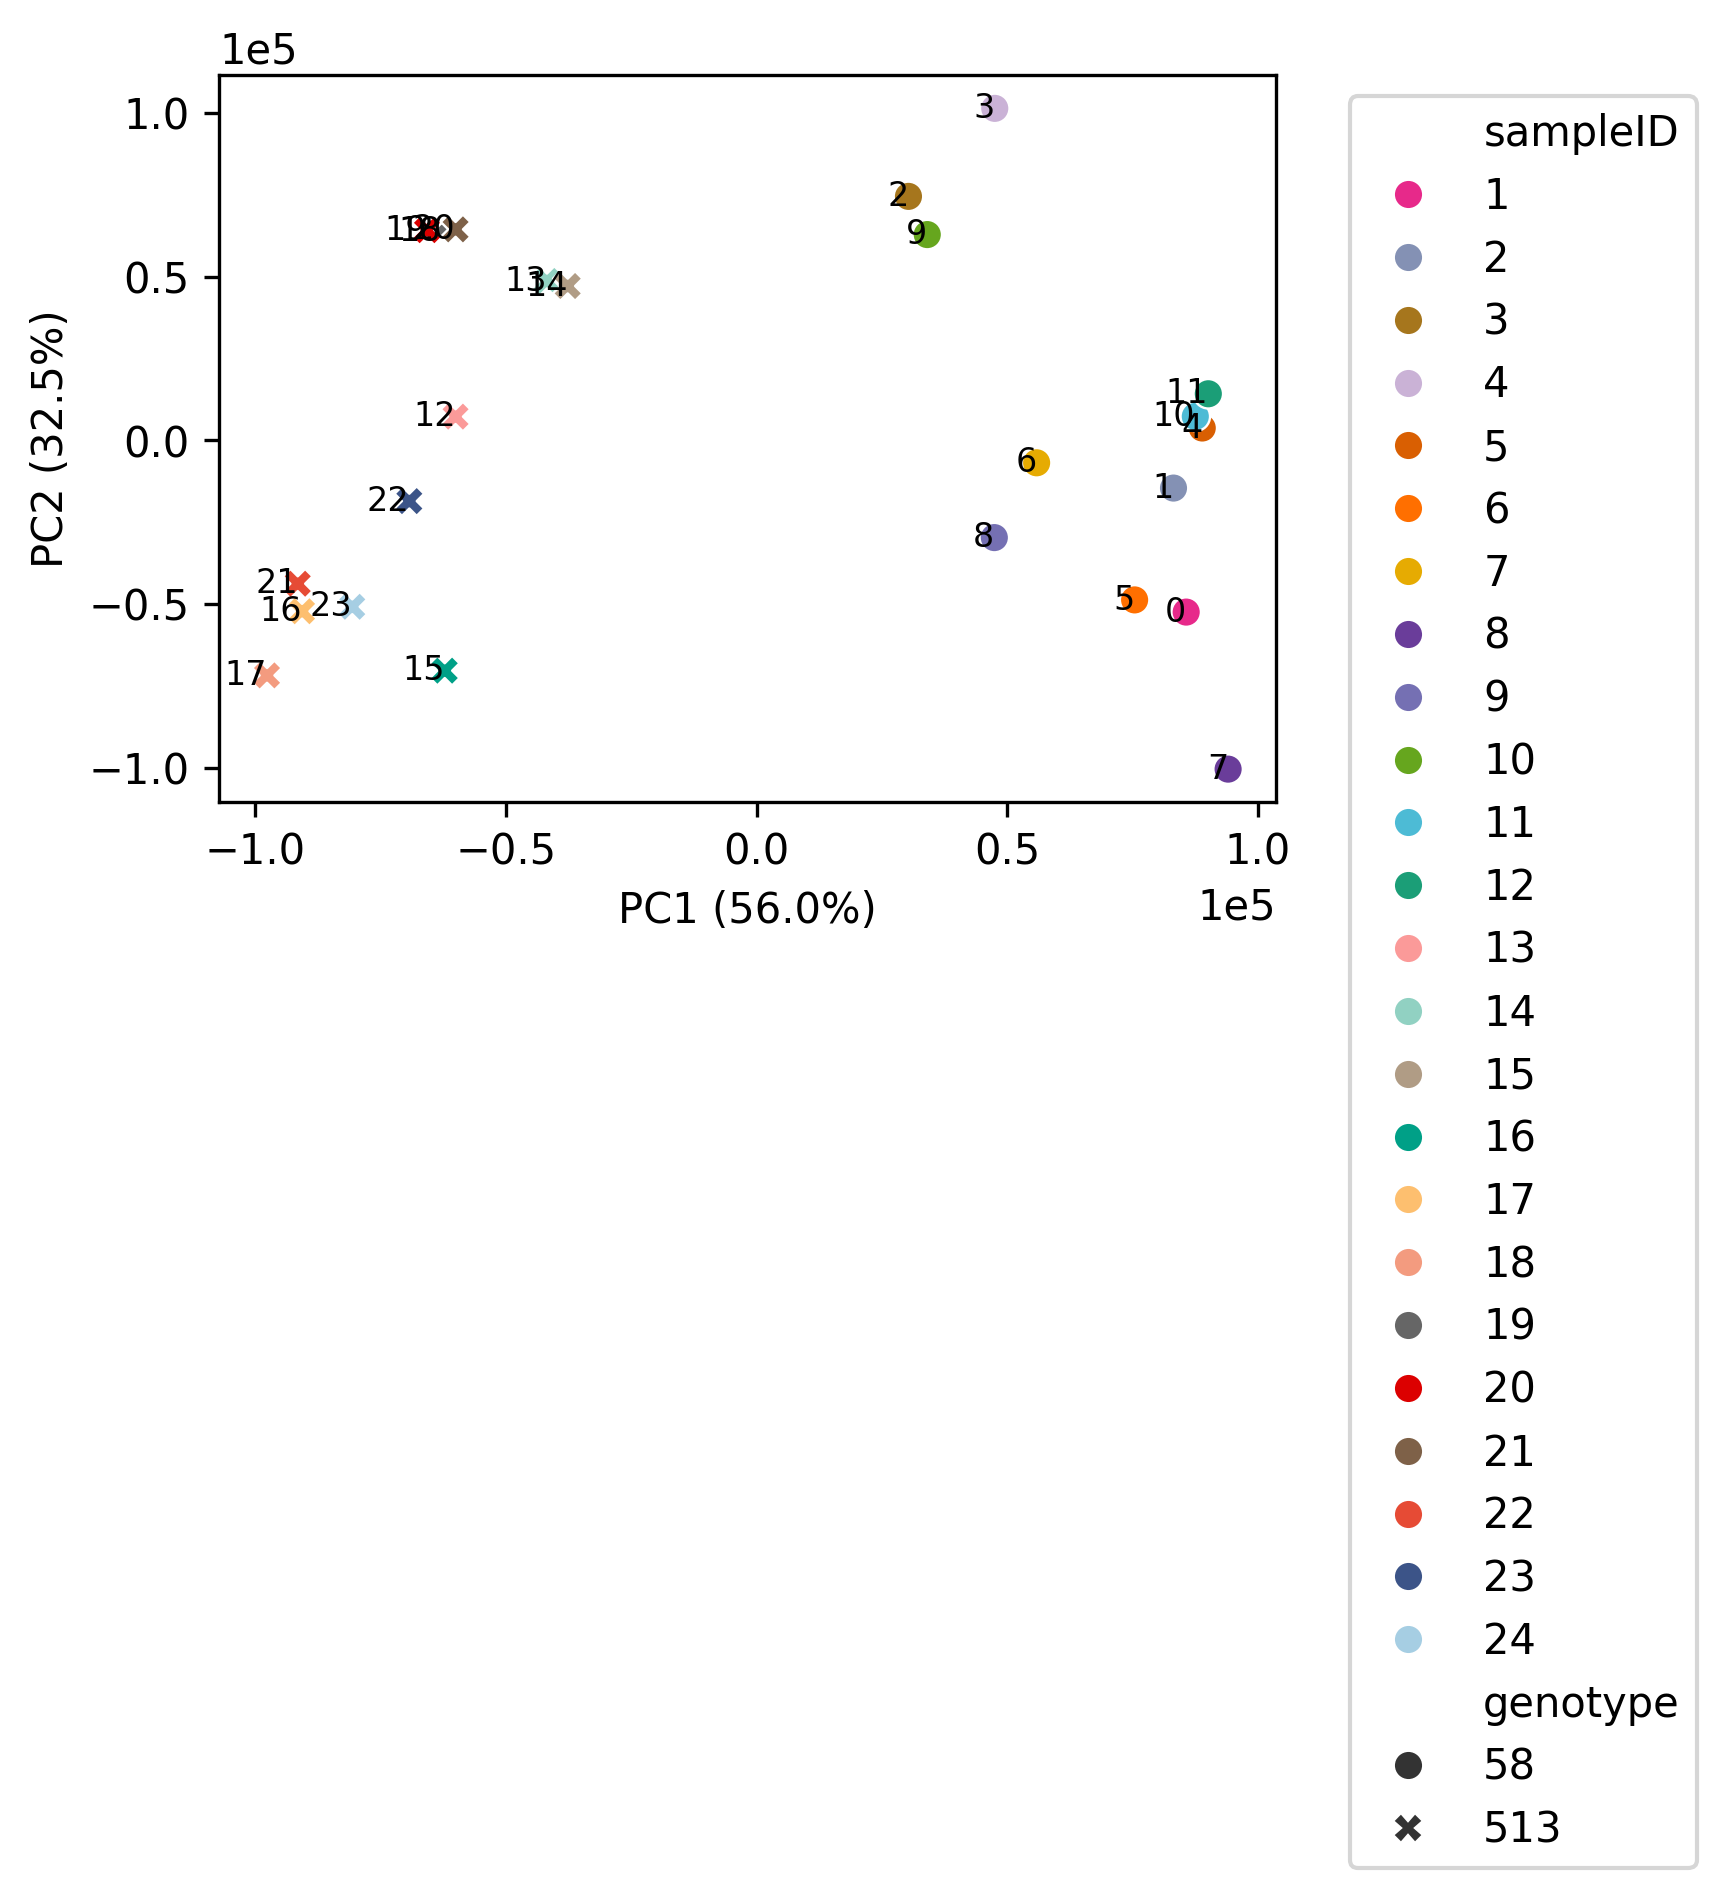

In [10]:
# Create the figure and axes explicitly
fig, ax = plt.subplots(figsize=(6, 5))

# Plot onto the axes
sns.scatterplot(
    data=pca_df,
    x=cols[0],
    y=cols[1],
    s=50,
    hue='sampleID',
    style='genotype',
    palette=colors,
    ax=ax
)

# Add text labels
for i, row in pca_df.iterrows():
    ax.text(
        row[cols[0]],
        row[cols[1]],
        str(i),  # sample name from index
        fontsize=8,
        ha='right',
        va='center'
    )

# Tidy axis tick labels
ax.ticklabel_format(style='sci', axis='both', scilimits=(-2, 2))

# Legend placement
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

plt.tight_layout()
plt.show()


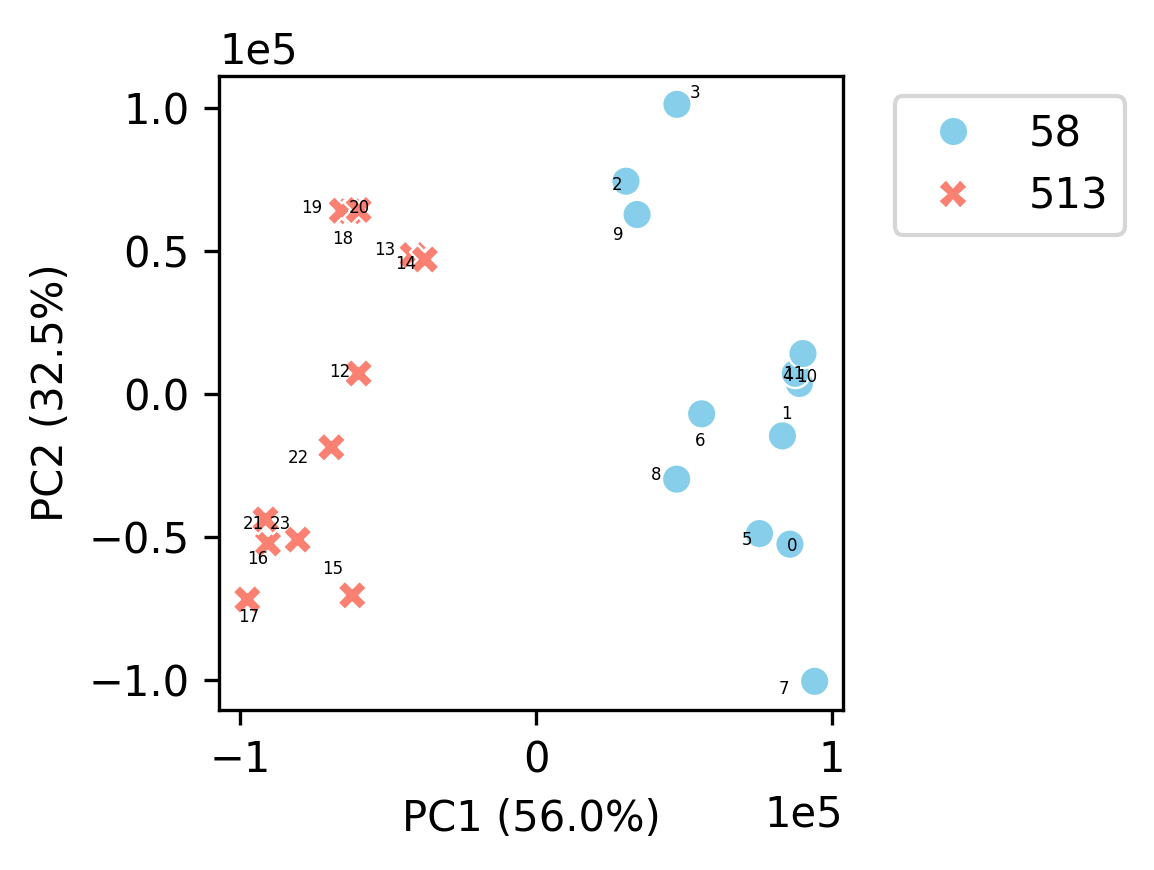

In [24]:
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Scatter plot
sns.scatterplot(
    data=pca_df,
    x=cols[0],
    y=cols[1],
    s=50,
    hue='genotype',
    style='genotype',
    palette=['skyblue', 'salmon'],
    ax=ax
)

# Add jittered text labels
for i, row in pca_df.iterrows():
    jitter_x = np.random.normal(loc=0, scale=5000)
    jitter_y = np.random.normal(loc=0, scale=5000)
    ax.text(
        row[cols[0]] + jitter_x,
        row[cols[1]] + jitter_y,
        str(i),
        fontsize=4,
        ha='right',
        va='center'
    )

# Format ticks
ax.ticklabel_format(style='sci', axis='both', scilimits=(-2, 2))

# Legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

plt.tight_layout()
plt.show()


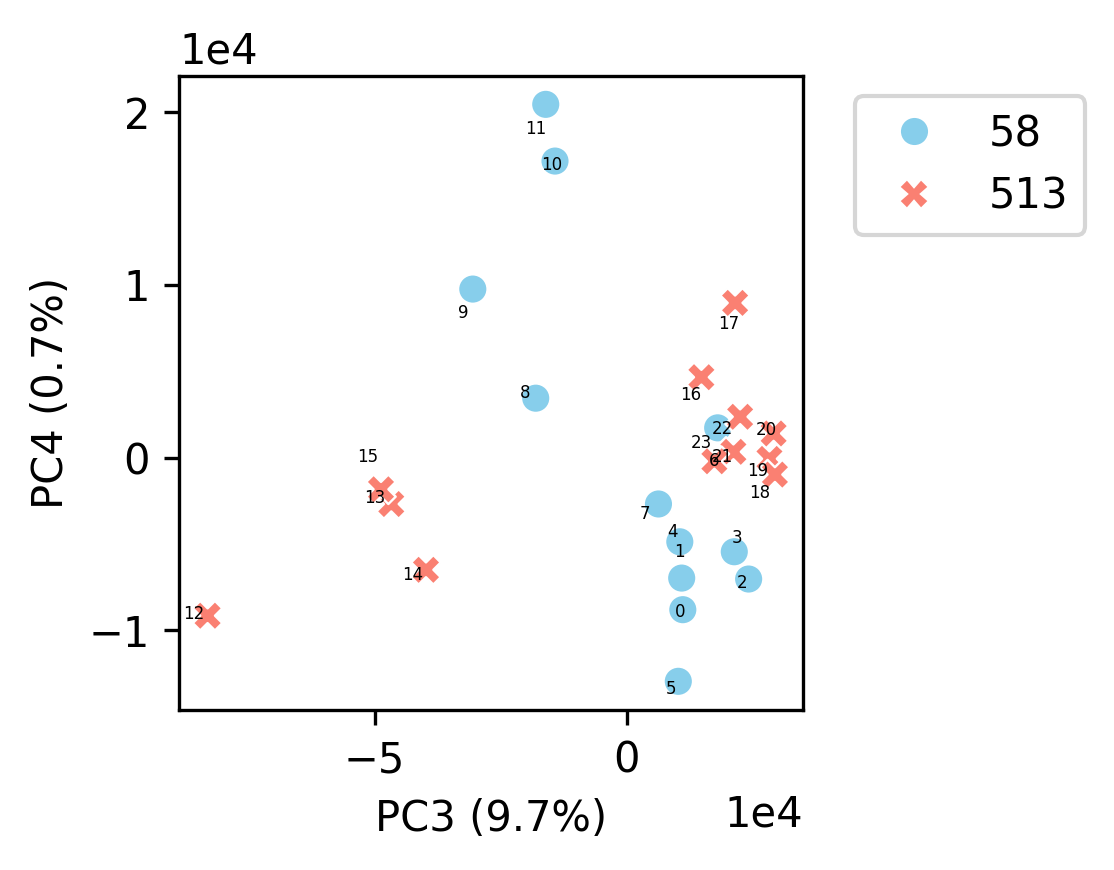

In [35]:
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Scatter plot
sns.scatterplot(
    data=pca_df,
    x=cols[2],
    y=cols[3],
    s=50,
    hue='genotype',
    style='genotype',
    palette=['skyblue', 'salmon'],
    ax=ax
)

# Add jittered text labels
for i, row in pca_df.iterrows():
    jitter_x = np.random.normal(loc=0, scale=1000)
    jitter_y = np.random.normal(loc=0, scale=1000)
    ax.text(
        row[cols[2]] + jitter_x,
        row[cols[3]] + jitter_y,
        str(i),
        fontsize=4,
        ha='right',
        va='center'
    )

# Format ticks
ax.ticklabel_format(style='sci', axis='both', scilimits=(-2, 2))

# Legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

plt.tight_layout()
plt.show()


# Exploratory heatmaps

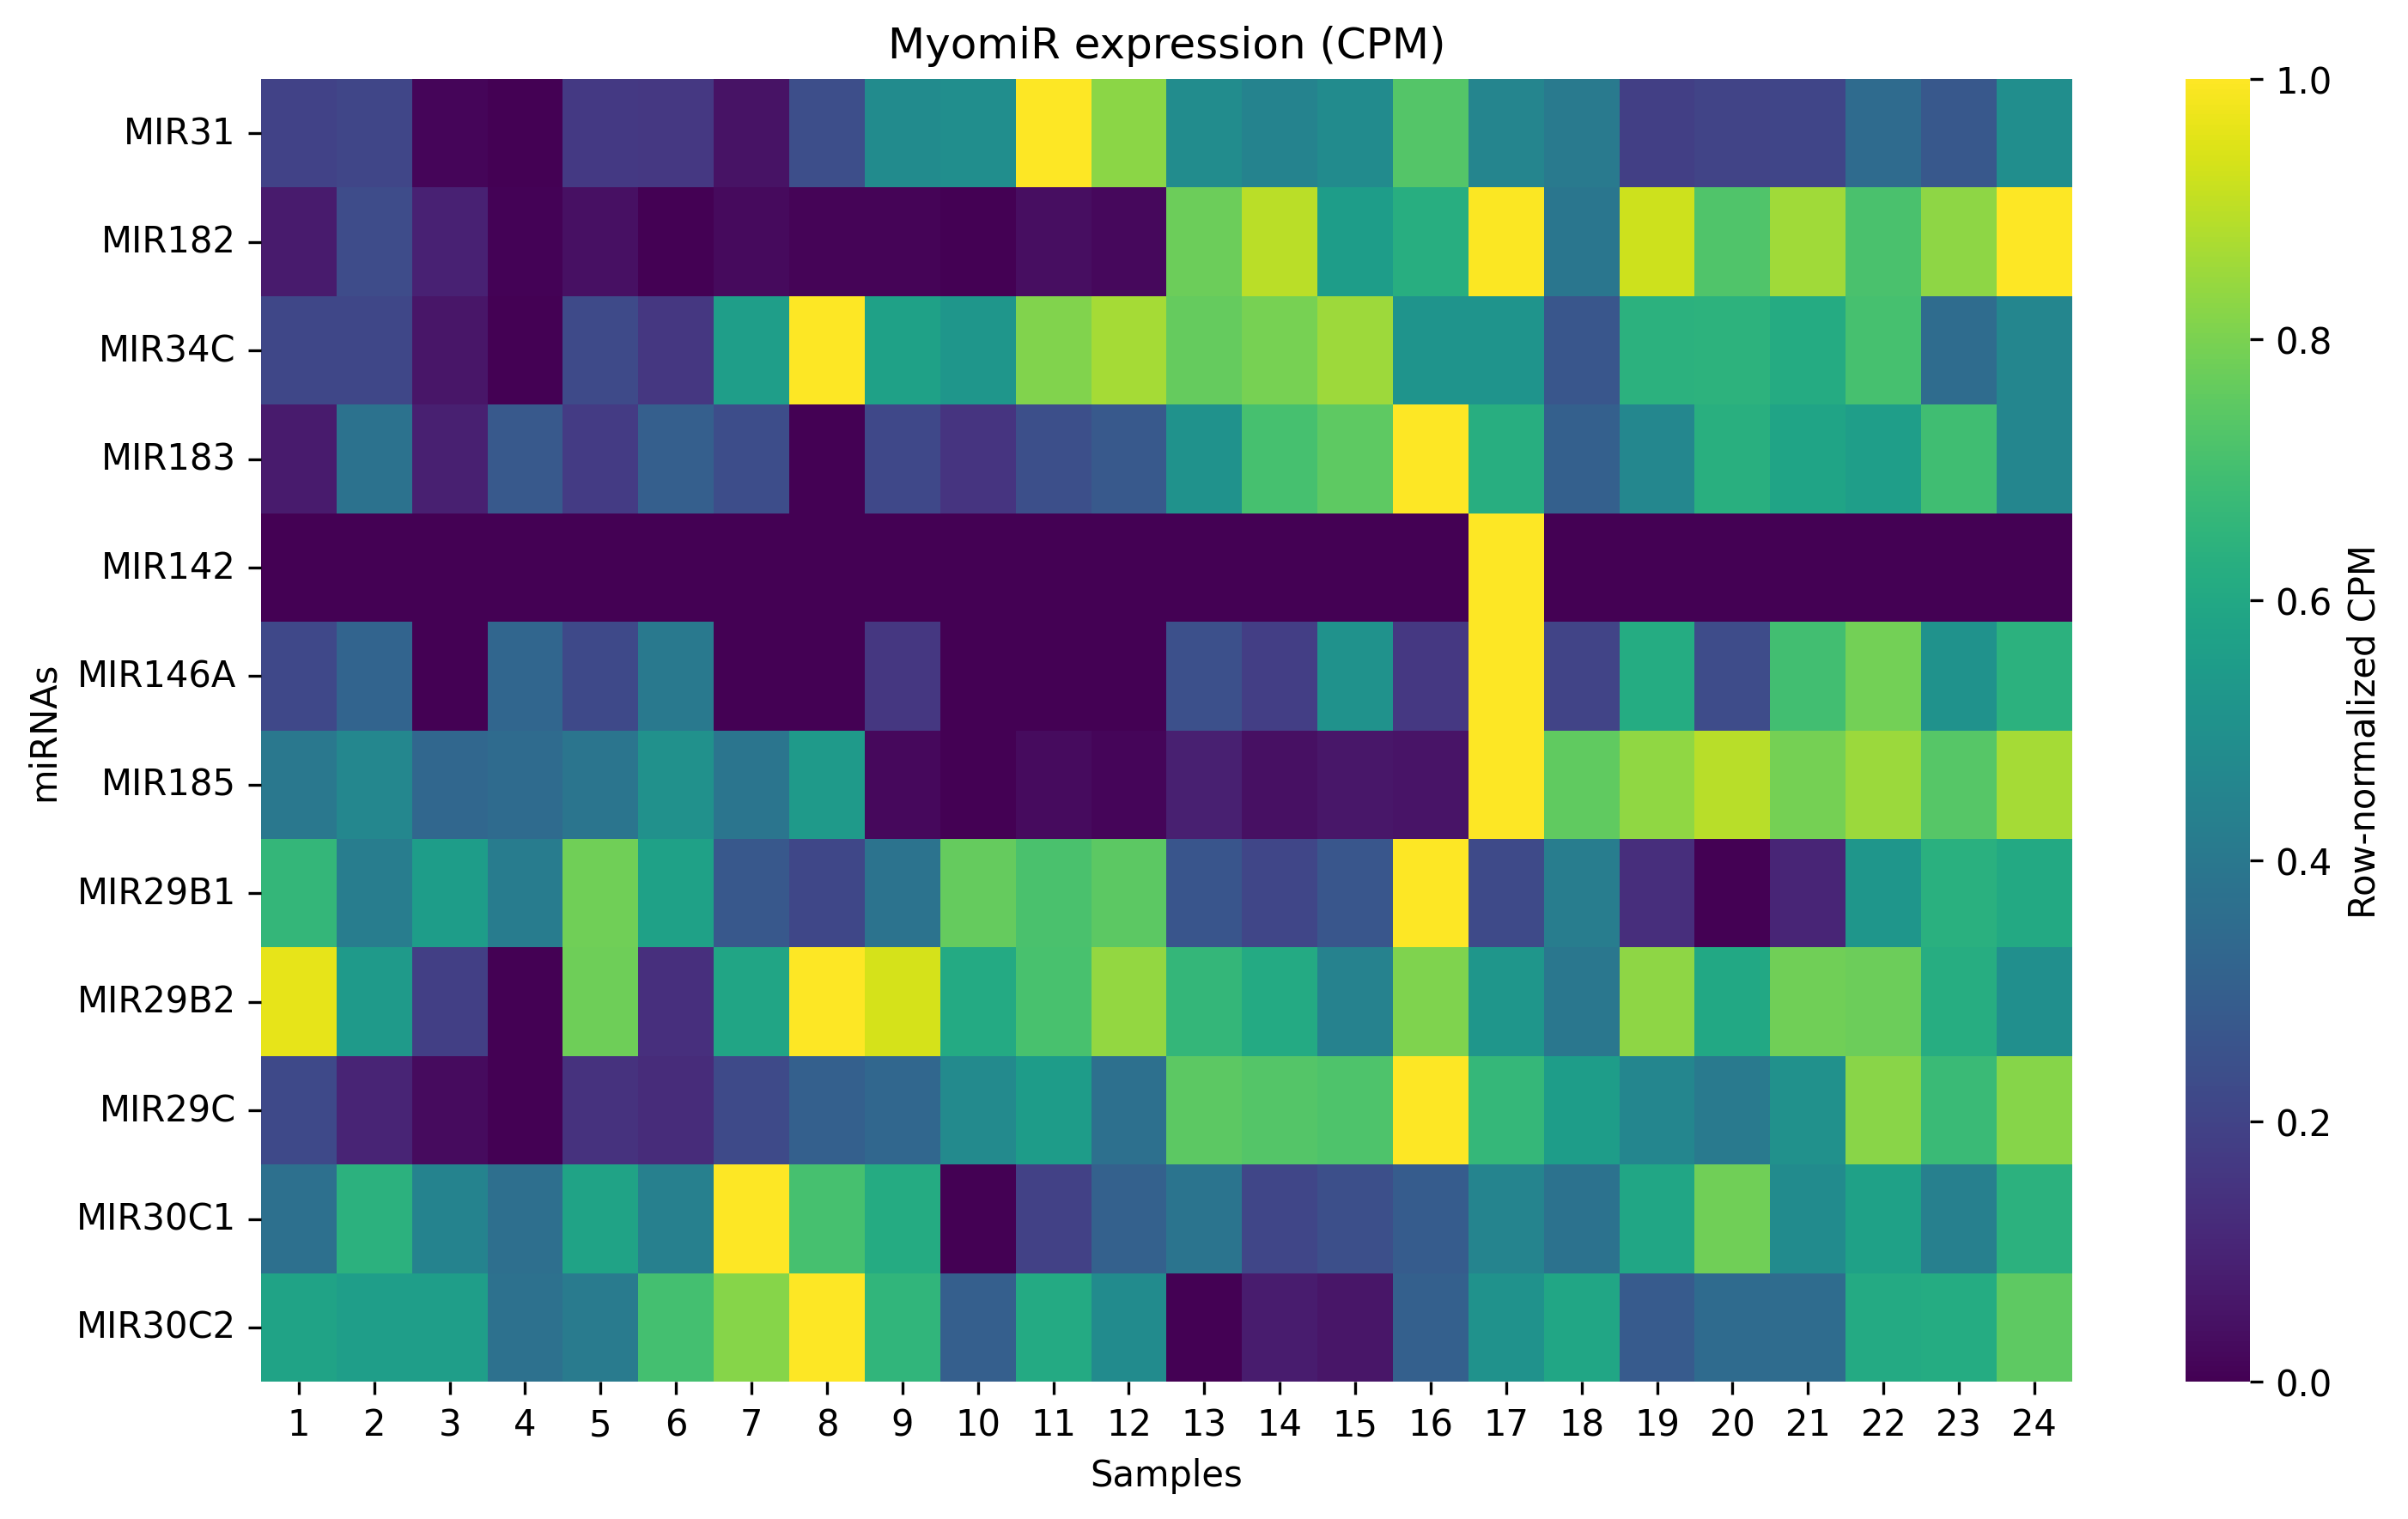

In [29]:
# Read cpm matrix
cpm = pd.read_csv("../counts/cpm_matrix_gene_name.tsv", sep="\t", header=0, index_col=0)

miRNAs_of_interest = [
    'MIR1-1', 'MIR1-2', 'MIR133A2', 'MIR133B', 'MIR206',
    'MIR378A', 'MIR29A', 'MIR29B1', 'MIR29C',
    'MIR181A1', 'MIR181B1', 'MIR181A2', 'MIR181B2',
    'MIR23A', 'MIR23B', 'MIR27A', 'MIR27B',
    'MIR199A2', 'MIR143', 'MIR145'#,'MIR486-1'
]
miRNAs_of_interest = ['MIR31', 'MIR182', 'MIR34C', 'MIR183','MIR142',
              'MIR146A','MIR185', 'MIR29B1', 'MIR29B2', 'MIR29C', 
              'MIR30C1','MIR30C2']

heatmap_data = cpm.loc[miRNAs_of_interest]

# Row normalize
heatmap_data = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="viridis", cbar_kws={'label': 'Row-normalized CPM'})
plt.xlabel("Samples")
plt.ylabel("miRNAs")
plt.title("MyomiR expression (CPM)")
plt.tight_layout()
plt.show()


In [30]:
def plot_pc_miRNA_heatmap(pca, input_df, cpm, pc=0):
    """
    Clustered heatmap of top 20 miRNAs most associated with a given PC.
    """
    #loadings = np.abs(pca.components_[pc])
    loadings = pca.components_[pc] * np.sqrt(pca.explained_variance_[pc])
    miRNAs = input_df.columns
    top = pd.Series(loadings, index=miRNAs).nlargest(20).index

    data = cpm.loc[top]
    data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

    g = sns.clustermap(
        data,
        cmap="viridis",
        figsize=(6.5, 7),
        cbar_kws={'label': 'Row-normalized CPM'},
        row_cluster=True,
        col_cluster=True  # preserve sample order
    )
    g.fig.suptitle(f"Top 20 miRNAs - PC{pc+1}", y=1.02)


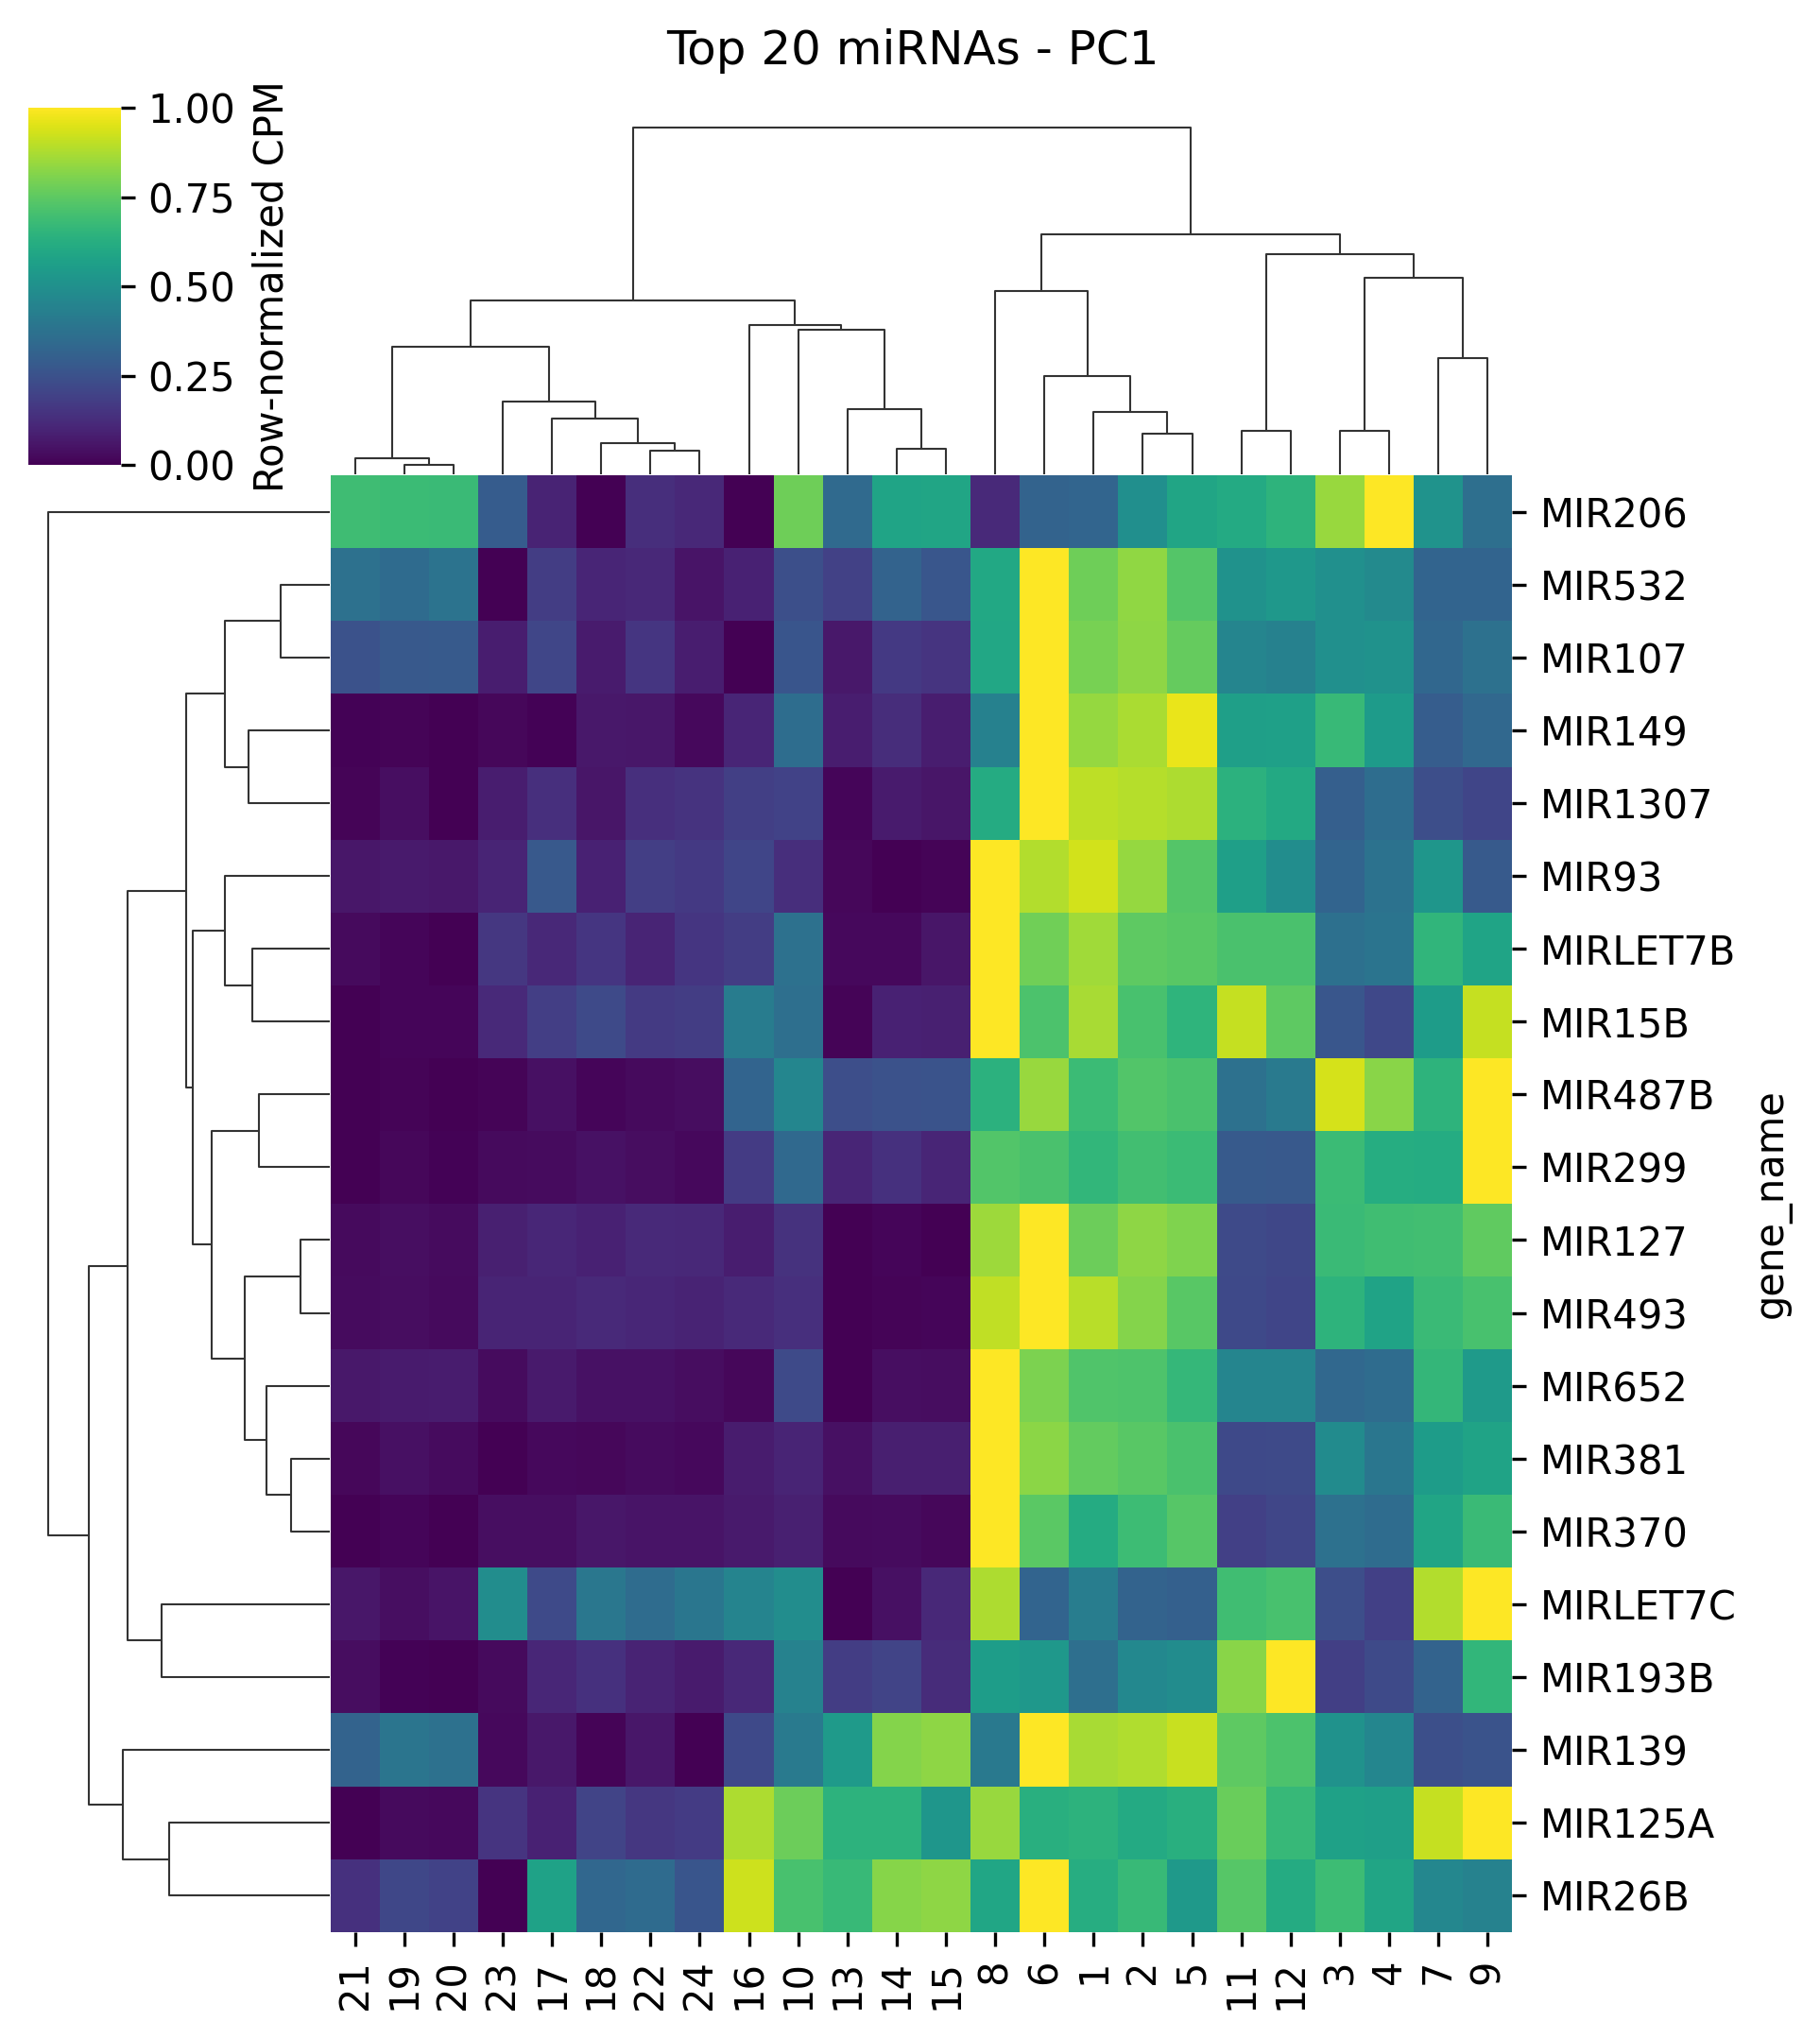

In [31]:
plot_pc_miRNA_heatmap(pca, input_df, cpm, pc=0)  # PC1


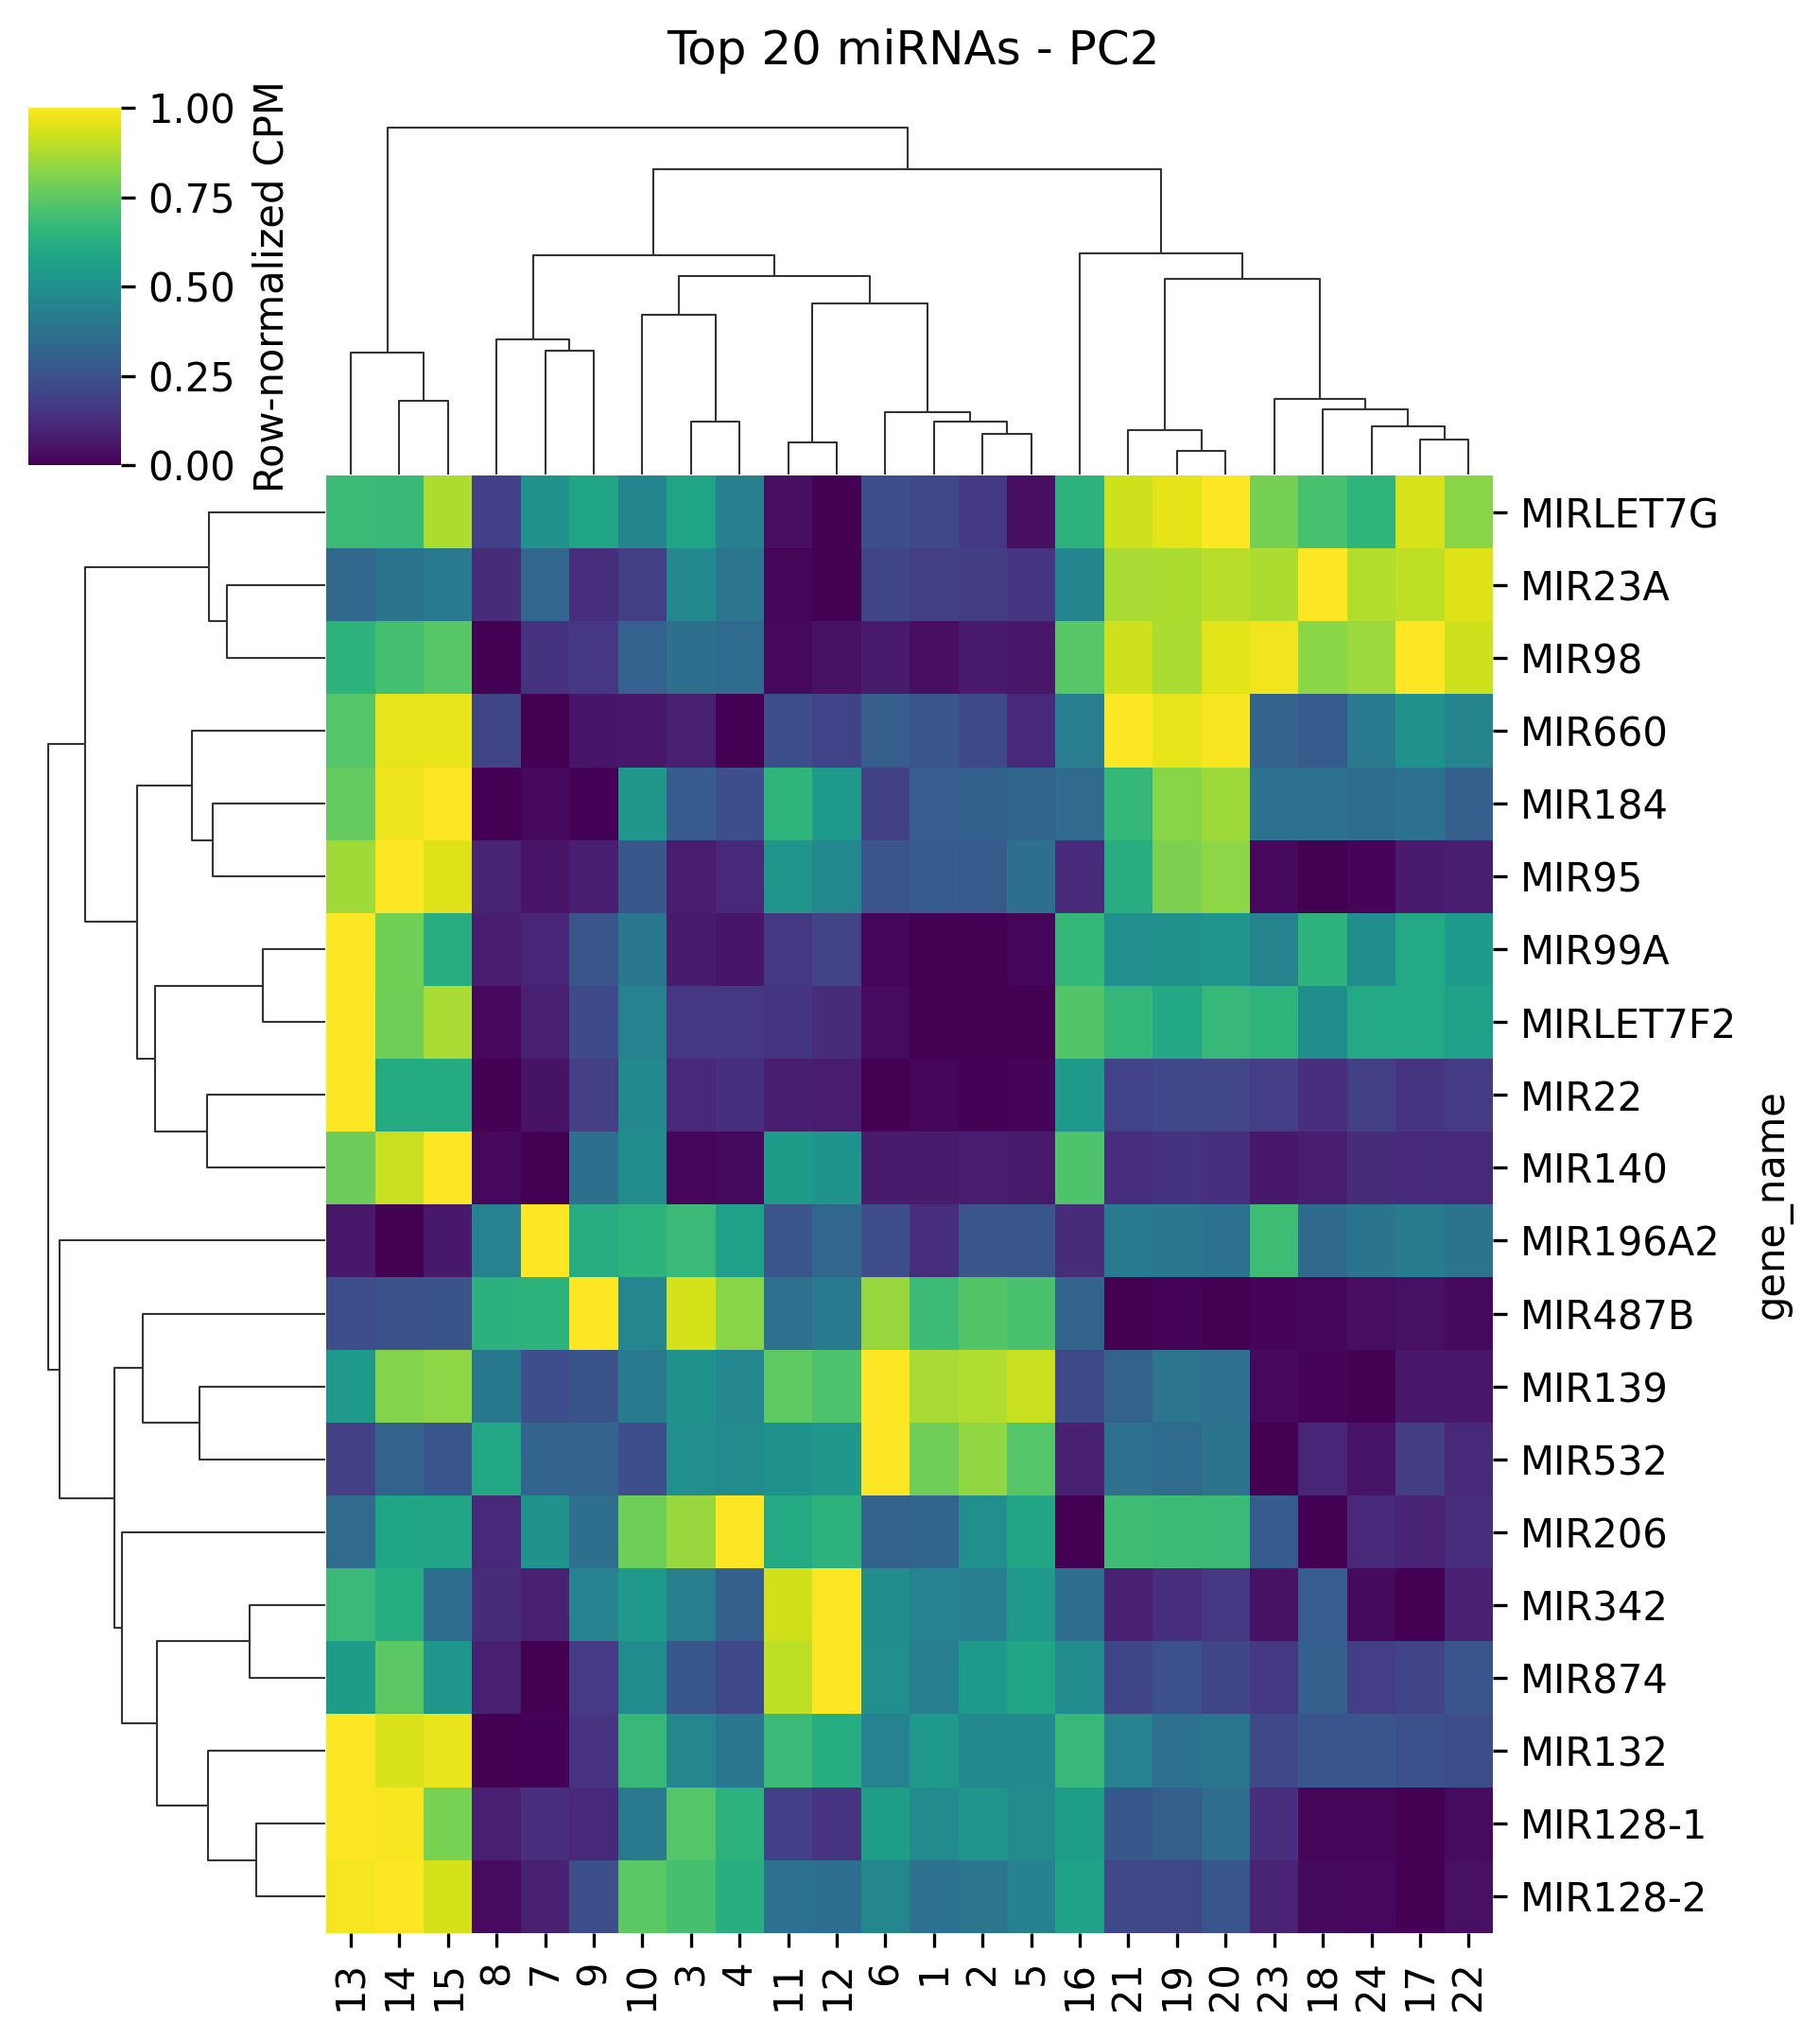

In [32]:
plot_pc_miRNA_heatmap(pca, input_df, cpm, pc=1)  # PC2


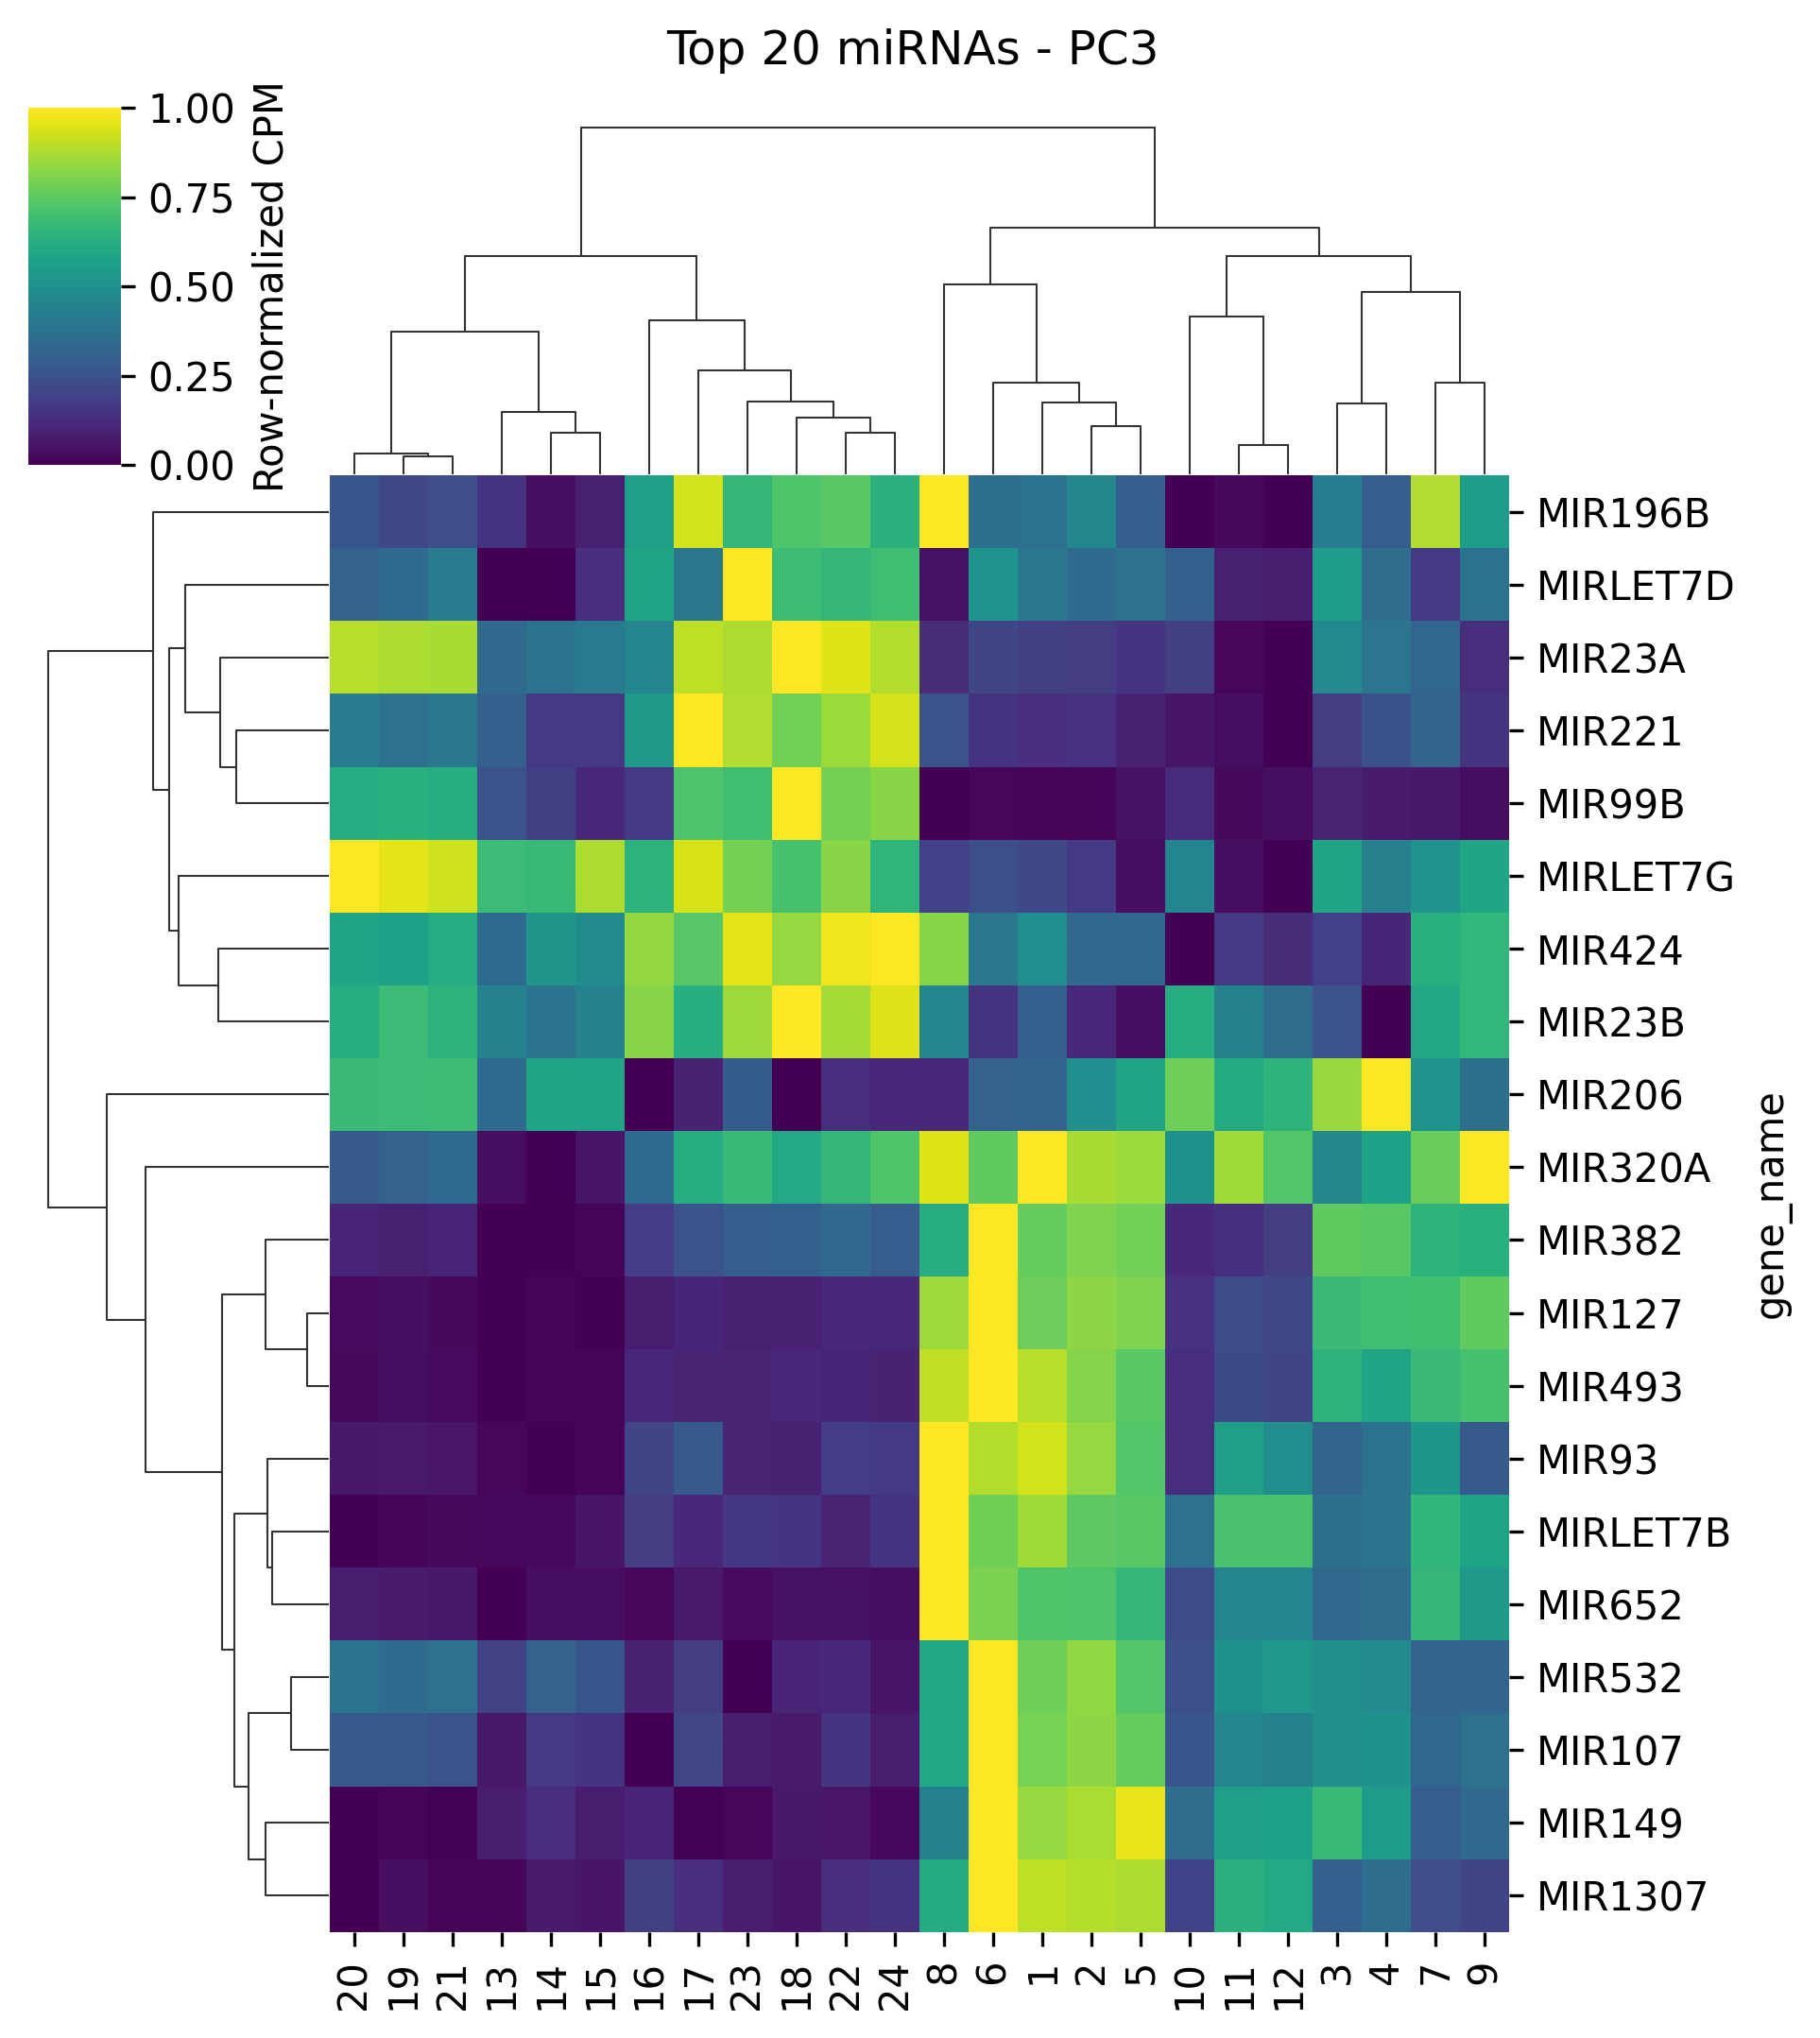

In [33]:
plot_pc_miRNA_heatmap(pca, input_df, cpm, pc=2)  # PC3


# Add gene names to matrices
Not just gene ID...

In [37]:
# import pandas as pd

# # Read GTF, only needed columns
# gtf = pd.read_csv(
#     "../ref/hg38_mirna.gtf",
#     sep="\t",
#     comment="#",
#     header=None,
#     names=["chrom", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
# )

# # Keep only gene features
# gtf_genes = gtf[gtf["feature"] == "gene"]

# # Extract gene_id and gene_name from attribute column
# def extract_attributes(attr_str):
#     fields = dict(
#         field.strip().replace('"', '').split(" ")
#         for field in attr_str.strip(";").split("; ")
#         if " " in field
#     )
#     return pd.Series([fields.get("gene_id"), fields.get("gene_name")], index=["gene_id", "gene_name"])

# gtf_mirna_info = gtf_genes["attribute"].apply(extract_attributes)

# # Drop duplicates if needed
# gtf_mirna_info = gtf_mirna_info.drop_duplicates().reset_index(drop=True)



In [59]:
# counts = pd.read_csv("../counts/counts_matrix.tsv", sep="\t", index_col=0)
# counts = counts.reset_index()  # index becomes column
# merged = counts.merge(gtf_mirna_info, on='gene_id', how='left')
# merged = merged.drop(columns=['gene_id']).set_index('gene_name')


In [62]:
# merged.to_csv("../counts/counts_matrix_gene_name.tsv", sep="\t")

# Differential expression

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


In [ ]:
# Read metadata and counts
meta = pd.read_csv("../ref/mirna_metadata.csv")
meta['genotype'] = meta['genotype'].astype(str)
meta['genotype'] = pd.Categorical(meta['genotype'], categories=['58', '513'], ordered=True)
meta.set_index('sampleID', inplace=True)

counts = pd.read_csv("../counts/counts_matrix_gene_name.tsv", sep="\t", index_col=0)

counts = counts[counts.sum(axis=1) > 0] # remove non-expressed microRNAs


# Create DESeq2 dataset
dds = DeseqDataSet(counts=counts.T, 
                   metadata=meta,
                   design_factors='genotype', 
                   ref_level=['genotype', '58'],
                   refit_cooks=True)

# Perform DESeq2 analysis
dds.deseq2()

# Extract statistics
stat_res = DeseqStats(dds, contrast=['genotype', '513', '58'])
stat_res.summary()

# Extract results
result_df = stat_res.results_df.reset_index()


result_df.to_csv('test.csv')

In [52]:
df = pd.read_csv('degs_513_vs_58.csv',index_col = 0) # ran in 

In [53]:
df

,gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,MIR200B,21.003434,0.149024,0.533258,0.279460,7.798919e-01,8.436133e-01
1,MIR200A,0.389227,1.954419,1.954041,1.000193,3.172169e-01,NaN
2,MIR429,0.729070,2.002220,1.297444,1.543203,1.227815e-01,2.270831e-01
3,MIR6726,43.313223,-1.449093,0.233663,-6.201646,5.587582e-10,4.710461e-09
4,MIR6727,6.388219,-0.415122,0.464131,-0.894408,3.711037e-01,5.174042e-01
...,...,...,...,...,...,...,...
1017,MIR452,35.950394,-0.500297,0.318654,-1.570031,1.164078e-01,2.186416e-01
1018,MIR767,1.469428,4.215430,2.688497,1.567950,1.168928e-01,2.189852e-01
1019,MIR718,0.403753,0.894467,1.770204,0.505290,6.133551e-01,NaN
1020,MIR6858,10.738038,-0.239814,0.347406,-0.690299,4.900060e-01,6.125075e-01


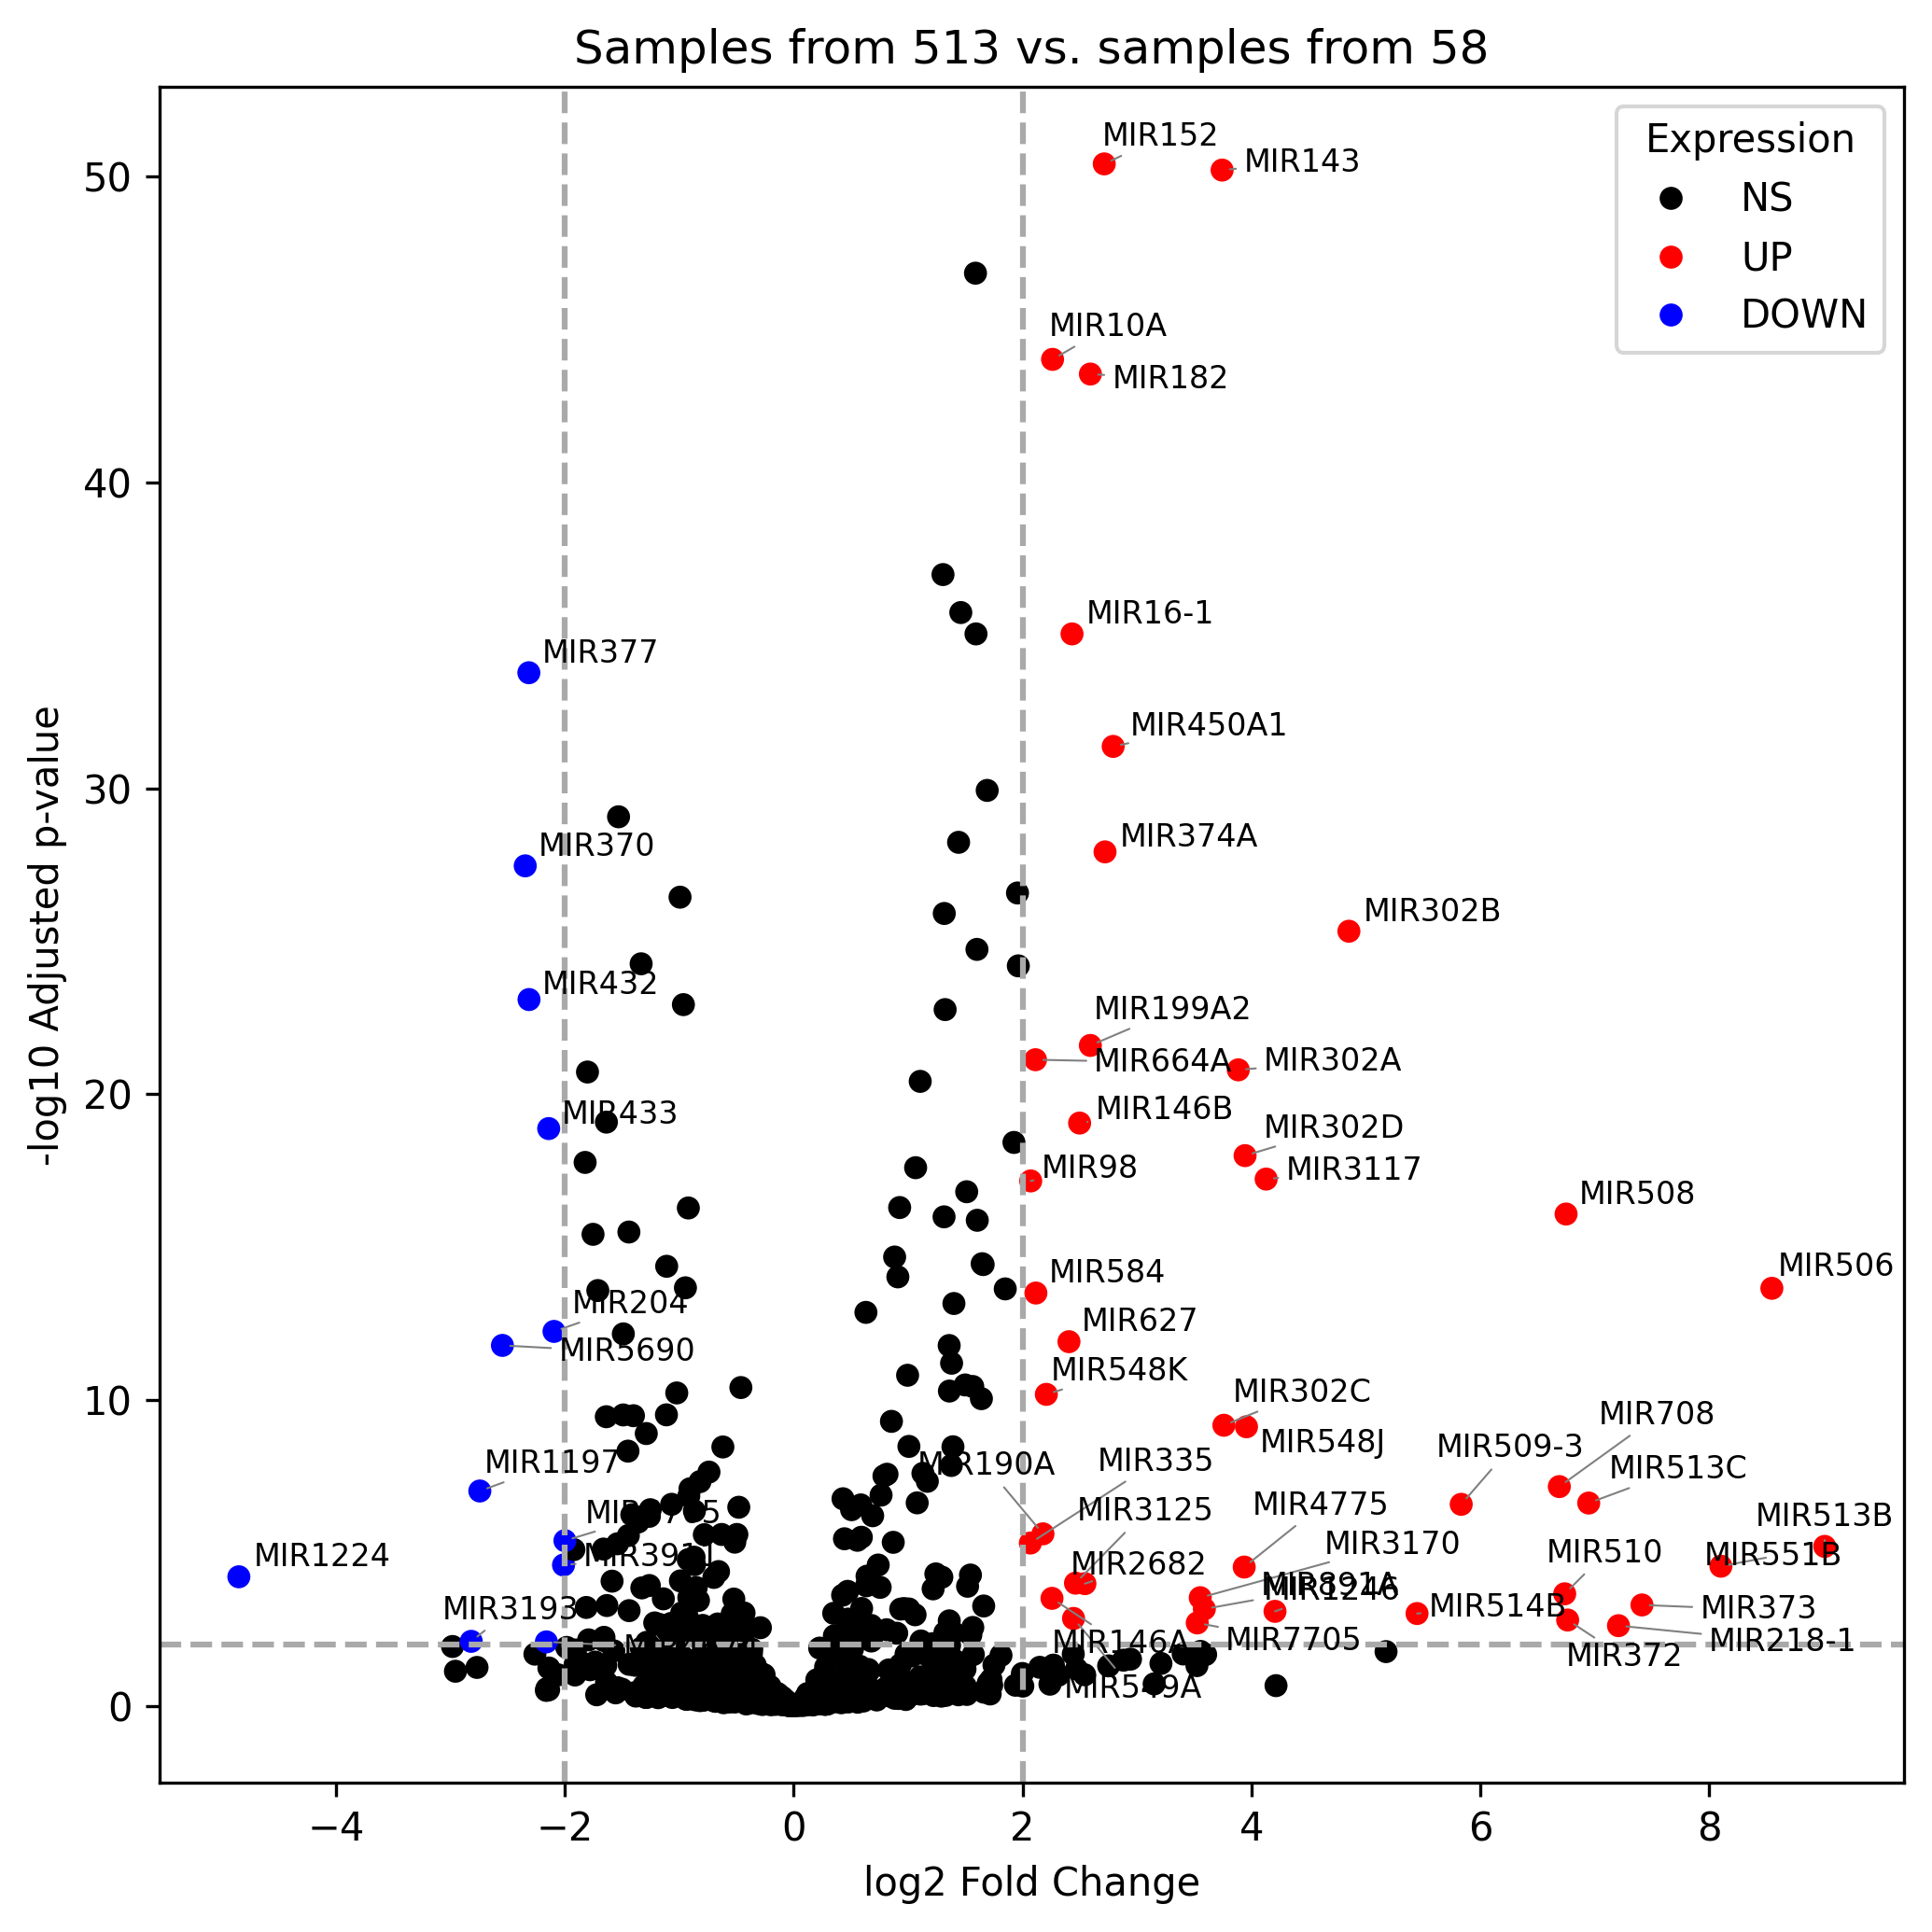

In [76]:
# Set thresholds
padj_cutoff = 0.01
l2fc_cutoff = 2

# Label significance
df['diffexpressed'] = 'NS'
df.loc[(df['padj'] < padj_cutoff) & (df['log2FoldChange'] > l2fc_cutoff), 'diffexpressed'] = 'UP'
df.loc[(df['padj'] < padj_cutoff) & (df['log2FoldChange'] < -l2fc_cutoff), 'diffexpressed'] = 'DOWN'

# Label genes
df['delabel'] = df['gene_name'].where(df['diffexpressed'] != 'NS')

# Plot
plt.figure(figsize=(7, 7))
sns.scatterplot(
    data=df,
    x='log2FoldChange',
    y=-np.log10(df['padj']),
    hue='diffexpressed',
    palette={'UP': 'red', 'DOWN': 'blue', 'NS': 'black'},
    edgecolor=None,
    s=30
)

# Axes cutoffs
plt.axhline(-np.log10(padj_cutoff), color='darkgrey', linestyle='--')
plt.axvline(x=l2fc_cutoff, color='darkgrey', linestyle='--')
plt.axvline(x=-l2fc_cutoff, color='darkgrey', linestyle='--')

# Label points
texts = [
    plt.text(row['log2FoldChange'], -np.log10(row['padj']), row['gene_name'], fontsize=8)
    for _, row in df[df['diffexpressed'] != 'NS'].iterrows()
]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

plt.title("Samples from 513 vs. samples from 58")
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10 Adjusted p-value")
plt.legend(title='Expression', loc='upper right')
plt.tight_layout()
plt.show()


In [71]:
de_mirnas = df[df['diffexpressed'].isin(['UP', 'DOWN'])]['gene_name'].tolist()


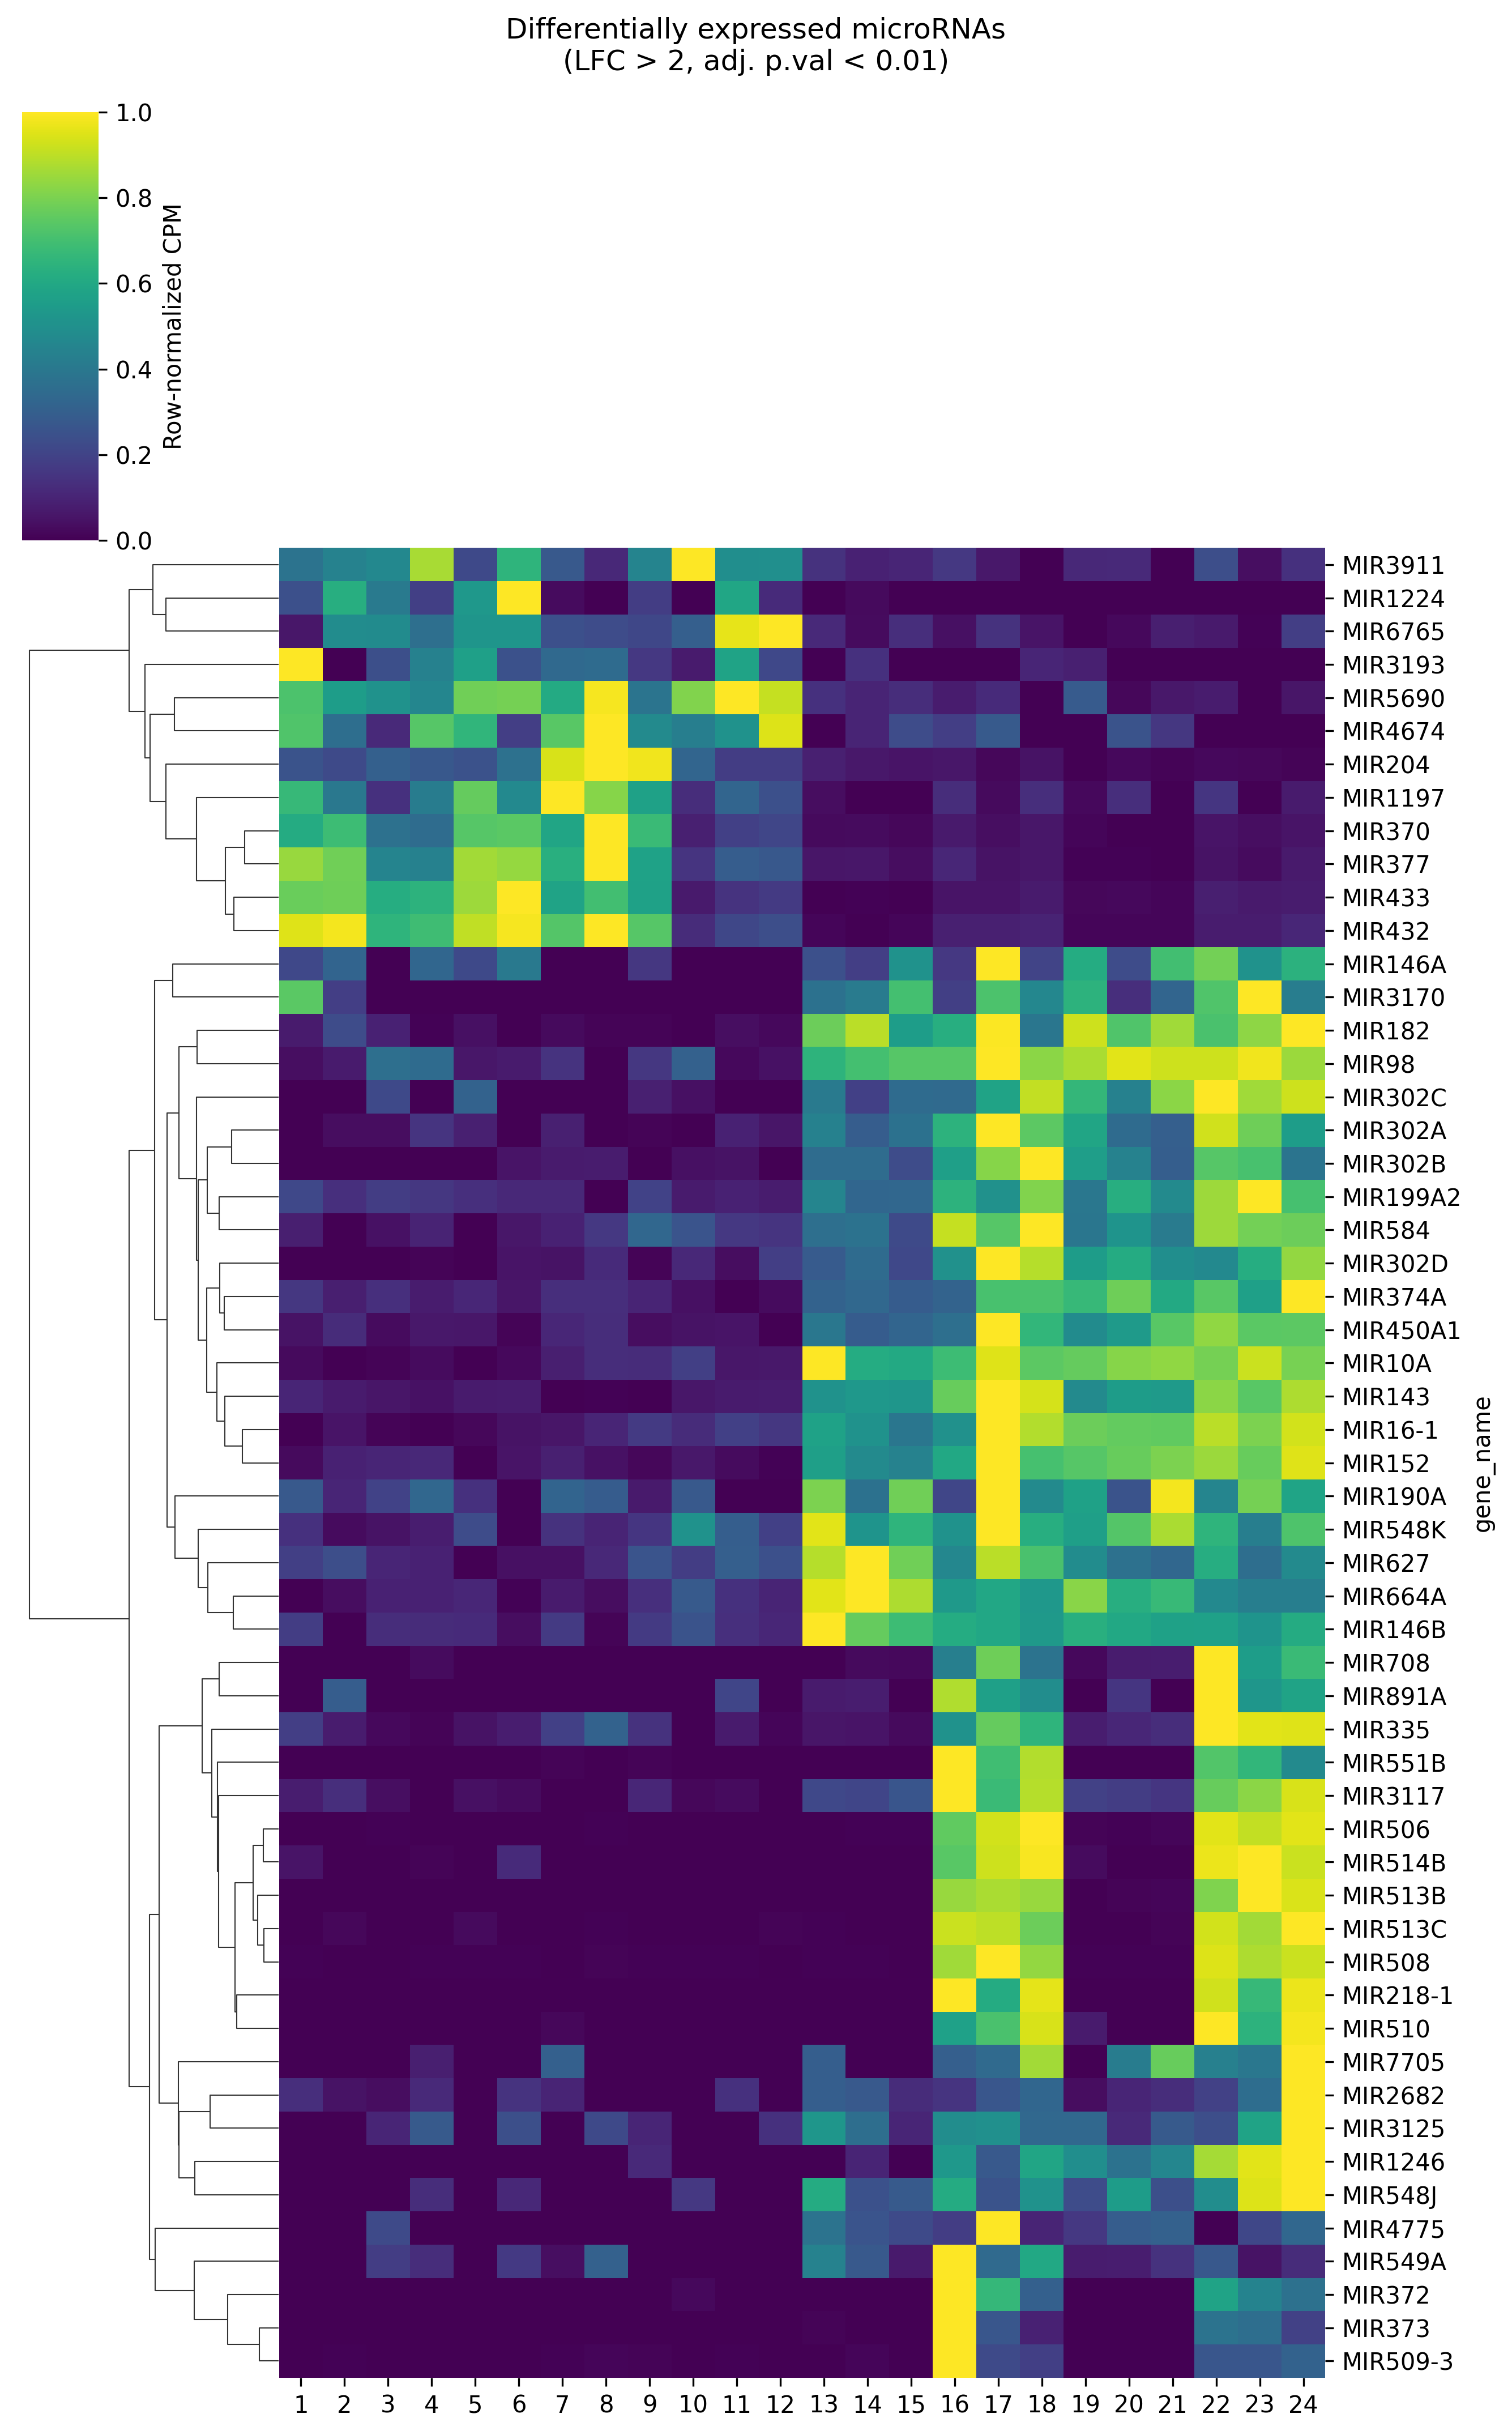

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read in CPM matrix
cpm = pd.read_csv("../counts/cpm_matrix_gene_name.tsv", sep="\t", header=0, index_col=0)

# Subset to differentially expressed miRNAs
heatmap_data = cpm.loc[de_mirnas]

# Row normalize (min-max normalization across samples)
heatmap_data = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Plot clustermap with only row clustering
g = sns.clustermap(
    heatmap_data,
    cmap="viridis",
    cbar_kws={'label': 'Row-normalized CPM'},
    row_cluster=True,
    col_cluster=False,
    figsize=(9, 14)
)

g.fig.suptitle(f"Differentially expressed microRNAs\n(LFC > {l2fc_cutoff}, adj. p.val < {padj_cutoff})", y=1.02)
plt.show()
